this notebook will be mainly used for the capstone project

In [125]:
$install sklearn



SyntaxError: invalid syntax (<ipython-input-125-d27710307d76>, line 1)

In [192]:
import pandas as pd
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.utils import resample
mpl.style.use('ggplot')

from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss



In [109]:
df = pd.read_csv( r'C:\Users\Makram\Collisions.csv')

C:\Users\Makram\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [110]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [157]:
df1= df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND','ADDRTYPE','JUNCTIONTYPE']]
df.reset_index
df1.head()


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,JUNCTIONTYPE
0,2,Overcast,Wet,Daylight,Intersection,At Intersection (intersection related)
1,1,Raining,Wet,Dark - Street Lights On,Block,Mid-Block (not related to intersection)
2,1,Overcast,Dry,Daylight,Block,Mid-Block (not related to intersection)
3,1,Clear,Dry,Daylight,Block,Mid-Block (not related to intersection)
4,2,Raining,Wet,Daylight,Intersection,At Intersection (intersection related)


In [158]:
pd.set_option('mode.chained_assignment', None)
df1.dropna(subset=['WEATHER'], how='all', inplace=True)
df1.dropna(subset=['ROADCOND'], how='all', inplace=True)
df1.dropna(subset=['LIGHTCOND'], how='all', inplace=True)
df1.dropna(subset=['ADDRTYPE'], how='all', inplace=True)
df1.dropna(subset=['JUNCTIONTYPE'], how='all', inplace=True)

In [160]:
pd.set_option('mode.chained_assignment', None)
df1.drop(df1[df1['WEATHER']=='Other' ].index,inplace=True ) 
df1.drop(df1[df1['WEATHER']=='Unknown'].index,inplace=True) 
df1.drop(df1[df1['ROADCOND']=='Other'].index,inplace=True ) 
df1.drop(df1[df1['ROADCOND']=='Unknown'].index ,inplace=True) 
df1.drop(df1[df1['LIGHTCOND']=='Other'].index ,inplace=True) 
df1.drop(df1[df1['LIGHTCOND']=='Unknown'].index ,inplace=True )
df1.drop(df1[df1['JUNCTIONTYPE']=='Unknown'].index ,inplace=True )
df1

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,JUNCTIONTYPE
0,2,Overcast,Wet,Daylight,Intersection,At Intersection (intersection related)
1,1,Raining,Wet,Dark - Street Lights On,Block,Mid-Block (not related to intersection)
2,1,Overcast,Dry,Daylight,Block,Mid-Block (not related to intersection)
3,1,Clear,Dry,Daylight,Block,Mid-Block (not related to intersection)
4,2,Raining,Wet,Daylight,Intersection,At Intersection (intersection related)
...,...,...,...,...,...,...
194668,2,Clear,Dry,Daylight,Block,Mid-Block (not related to intersection)
194669,1,Raining,Wet,Daylight,Block,Mid-Block (not related to intersection)
194670,2,Clear,Dry,Daylight,Intersection,At Intersection (intersection related)
194671,2,Clear,Dry,Dusk,Intersection,At Intersection (intersection related)


In [161]:
df1['SEVERITYCODE'].value_counts()

1    112015
2     55320
Name: SEVERITYCODE, dtype: int64

In [162]:
bal1=df1[df1.SEVERITYCODE==1]
bal2=df1[df1.SEVERITYCODE==2]
bal1_desample=resample(bal1,replace=False,n_samples=55320,random_state=100)

df2=pd.concat([bal1_desample,bal2])
df2['SEVERITYCODE'].value_counts()
df2

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,JUNCTIONTYPE
137899,1,Raining,Wet,Dark - Street Lights On,Intersection,At Intersection (intersection related)
25062,1,Clear,Dry,Dark - Street Lights On,Intersection,At Intersection (intersection related)
115285,1,Raining,Wet,Dark - Street Lights On,Intersection,At Intersection (intersection related)
100430,1,Raining,Wet,Daylight,Block,Mid-Block (not related to intersection)
76265,1,Clear,Dry,Dark - Street Lights On,Block,Mid-Block (not related to intersection)
...,...,...,...,...,...,...
194663,2,Raining,Wet,Daylight,Block,Mid-Block (not related to intersection)
194666,2,Clear,Wet,Daylight,Block,Mid-Block (not related to intersection)
194668,2,Clear,Dry,Daylight,Block,Mid-Block (not related to intersection)
194670,2,Clear,Dry,Daylight,Intersection,At Intersection (intersection related)


In [163]:
df2.reset_index()

,index,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,JUNCTIONTYPE
0,137899,1,Raining,Wet,Dark - Street Lights On,Intersection,At Intersection (intersection related)
1,25062,1,Clear,Dry,Dark - Street Lights On,Intersection,At Intersection (intersection related)
2,115285,1,Raining,Wet,Dark - Street Lights On,Intersection,At Intersection (intersection related)
3,100430,1,Raining,Wet,Daylight,Block,Mid-Block (not related to intersection)
4,76265,1,Clear,Dry,Dark - Street Lights On,Block,Mid-Block (not related to intersection)
...,...,...,...,...,...,...,...
110635,194663,2,Raining,Wet,Daylight,Block,Mid-Block (not related to intersection)
110636,194666,2,Clear,Wet,Daylight,Block,Mid-Block (not related to intersection)
110637,194668,2,Clear,Dry,Daylight,Block,Mid-Block (not related to intersection)
110638,194670,2,Clear,Dry,Daylight,Intersection,At Intersection (intersection related)


In [164]:
df['SEVERITYCODE COUNT'] = df.count(axis=1)
df_SC = df.groupby('SEVERITYCODE', axis=0).count()
df_SC

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,SEVERITYCODE COUNT,SPEEDING COUNT,HITPARKEDCAR COUNT
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
1,132221,132221,136485,136485,136485,136485,136485,134750,37251,134081,...,81429,136485,136480,132622,136485,136485,136485,136485,136485,136485
2,57118,57118,58188,58188,58188,58188,58188,57997,27819,57915,...,33507,58188,58175,57147,58188,58188,58188,58188,58188,58188


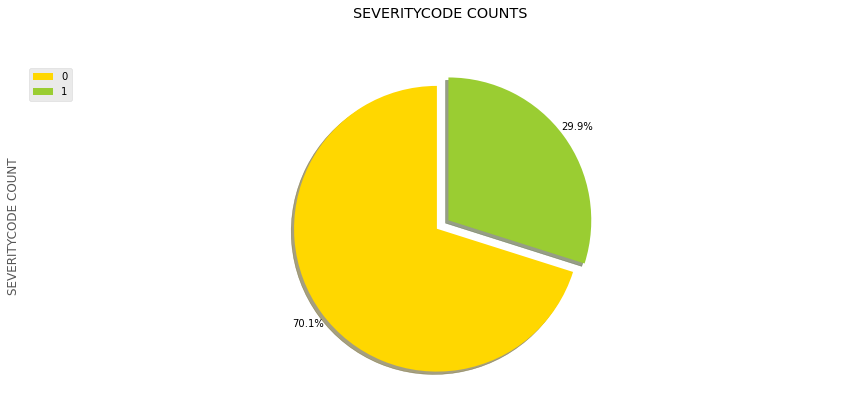

In [165]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0] # ratio for each continent with which to offset each wedge.

df_SC['SEVERITYCODE COUNT'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

plt.title('SEVERITYCODE COUNTS ', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df.index, loc='upper left') 

plt.show()

In [166]:
df["SPEEDING"].fillna("No Data", inplace = True)
df['SPEEDING COUNT'] = df.count(axis=1)

df_SPEEDING = df.groupby('SPEEDING', axis=0).count()
df_SPEEDING

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,PEDROWNOTGRNT,SDOTCOLNUM,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,SEVERITYCODE COUNT,SPEEDING COUNT,HITPARKEDCAR COUNT
SPEEDING,,,,,,,,,,,,,,,,,,,,,
No Data,185340,180619,180619,185340,185340,185340,185340,185340,183468,63108,...,4624,108541,185323,180437,185340,185340,185340,185340,185340,185340
Y,9333,8720,8720,9333,9333,9333,9333,9333,9279,1962,...,43,6395,9332,9332,9333,9333,9333,9333,9333,9333


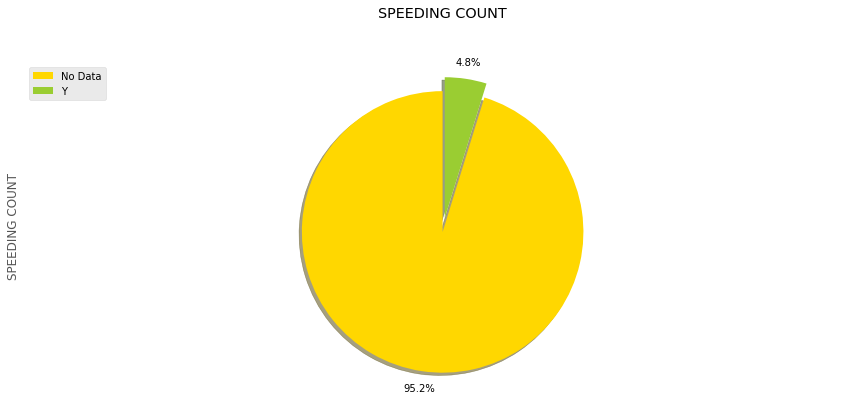

In [167]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0] # ratio for each continent with which to offset each wedge.

df_SPEEDING['SPEEDING COUNT'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

plt.title('SPEEDING COUNT', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_SPEEDING.index, loc='upper left') 

plt.show()

In [168]:
df["HITPARKEDCAR"].fillna("No Data", inplace = True)
df['HITPARKEDCAR COUNT'] = df.count(axis=1)

df_HITPARKEDCAR = df.groupby('SPEEDING', axis=0).count()
df_HITPARKEDCAR

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,PEDROWNOTGRNT,SDOTCOLNUM,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,SEVERITYCODE COUNT,SPEEDING COUNT,HITPARKEDCAR COUNT
SPEEDING,,,,,,,,,,,,,,,,,,,,,
No Data,185340,180619,180619,185340,185340,185340,185340,185340,183468,63108,...,4624,108541,185323,180437,185340,185340,185340,185340,185340,185340
Y,9333,8720,8720,9333,9333,9333,9333,9333,9279,1962,...,43,6395,9332,9332,9333,9333,9333,9333,9333,9333


In [122]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0] # ratio for each continent with which to offset each wedge.

df_SPEEDING['HITPARKEDCAR COUNT'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

plt.title('HITPARKEDCAR COUNT', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_HITPARKEDCAR.index, loc='upper left') 

plt.show()

KeyError: 'HITPARKEDCAR COUNT'

In [169]:
df2['SEVERITYCODE COUNT'] = df.count(axis=1)
df_SC = df2.groupby('SEVERITYCODE', axis=0).count()
df_SC

,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,JUNCTIONTYPE,SEVERITYCODE COUNT
SEVERITYCODE,,,,,,
1,55320,55320,55320,55320,55320,55320
2,55320,55320,55320,55320,55320,55320


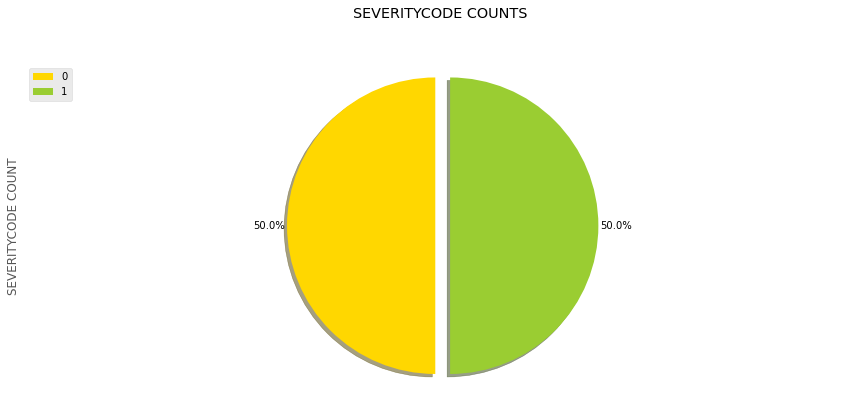

In [127]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0] # ratio for each continent with which to offset each wedge.

df_SC['SEVERITYCODE COUNT'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

plt.title('SEVERITYCODE COUNTS ', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df.index, loc='upper left') 

plt.show()

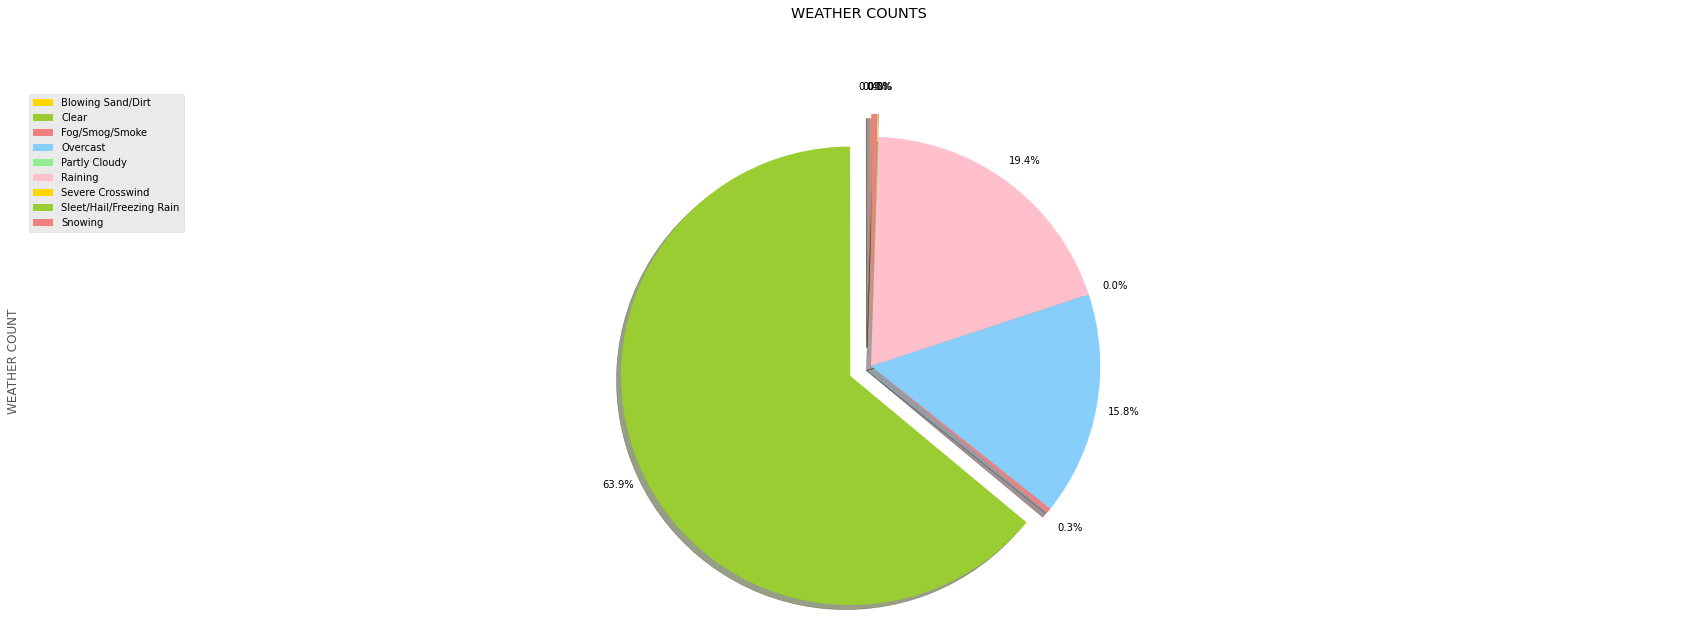

In [128]:
df2['WEATHER COUNT'] = df2.count(axis=1)
df_SC2 =df2.groupby('WEATHER').count()
df_SC2
explode_list = [0.1, 0.1,0,0,0.0,0,0.1,0.1,0.1] # ratio for each continent with which to offset each wedge.

df_SC2['WEATHER COUNT'].plot(kind='pie',
                            figsize=(30, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

plt.title('WEATHER COUNTS ', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_SC2.index, loc='upper left') 

plt.show()

Text(0, 0.5, 'sevirties')

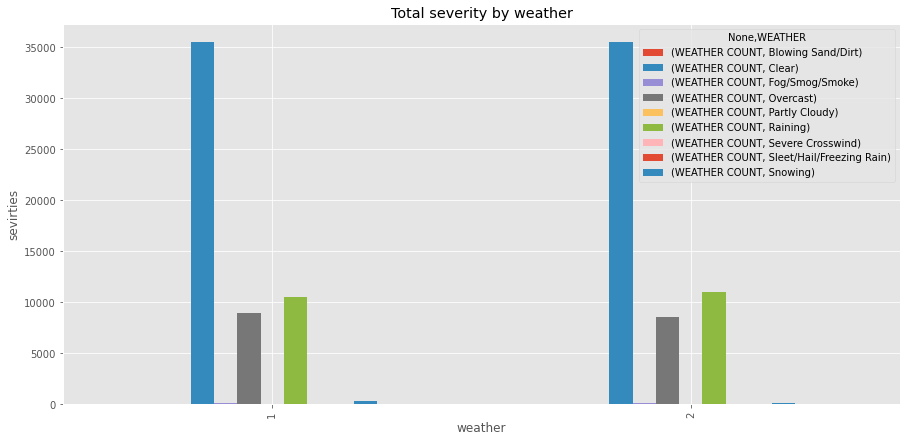

In [129]:
df2['WEATHER COUNT'] = df.count(axis=1)
df4=df2[['SEVERITYCODE','WEATHER','WEATHER COUNT']]
df5 = df4.groupby((['SEVERITYCODE','WEATHER']), axis=0).count()
df5.unstack()
my_plot = df5.unstack().plot(kind='bar',title="Total severity by weather",figsize=(15,7))
my_plot.set_xlabel("weather")
my_plot.set_ylabel("sevirties")

Text(0, 0.5, 'sevirties')

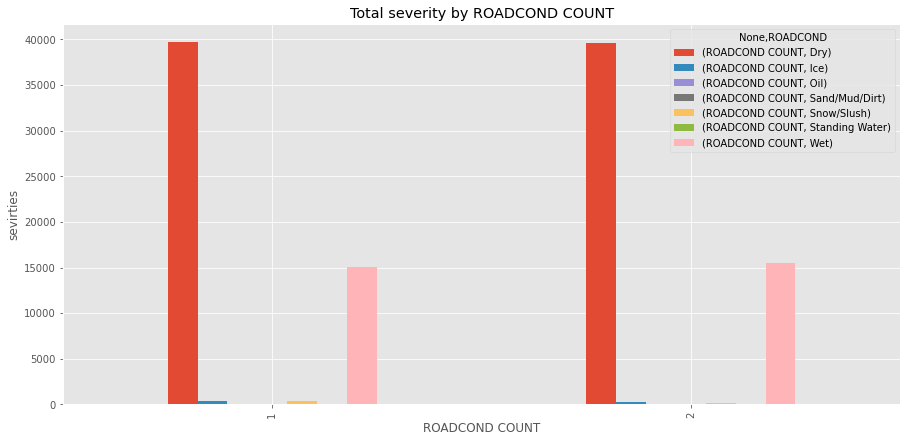

In [130]:
df2['ROADCOND COUNT'] = df.count(axis=1)
df_SC4 =df2.groupby('ROADCOND').count()
df_SC4
df6=df2[['SEVERITYCODE','ROADCOND','ROADCOND COUNT']]
df7 = df6.groupby((['SEVERITYCODE','ROADCOND']), axis=0).count()
df7.unstack()
my_plot = df7.unstack().plot(kind='bar',title="Total severity by ROADCOND COUNT",figsize=(15,7))
my_plot.set_xlabel("ROADCOND COUNT")
my_plot.set_ylabel("sevirties")

Text(0, 0.5, 'sevirties')

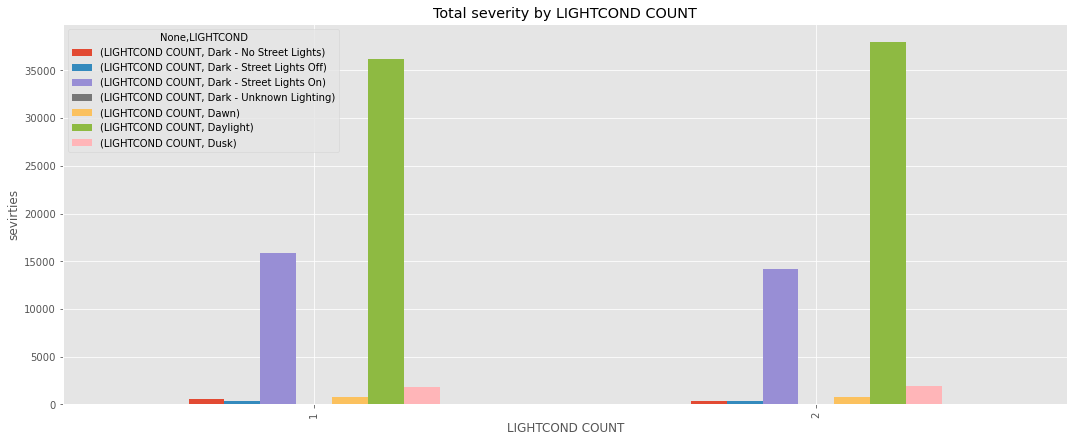

In [131]:
df2['LIGHTCOND COUNT'] = df.count(axis=1)
df_SC5 =df2.groupby('LIGHTCOND').count()
df_SC5
df8=df2[['SEVERITYCODE','LIGHTCOND','LIGHTCOND COUNT']]
df9 = df8.groupby((['SEVERITYCODE','LIGHTCOND']), axis=0).count()
df9.unstack()
my_plot = df9.unstack().plot(kind='bar',title="Total severity by LIGHTCOND COUNT",figsize=(18,7))
my_plot.set_xlabel("LIGHTCOND COUNT")
my_plot.set_ylabel("sevirties")

Text(0, 0.5, 'sevirties')

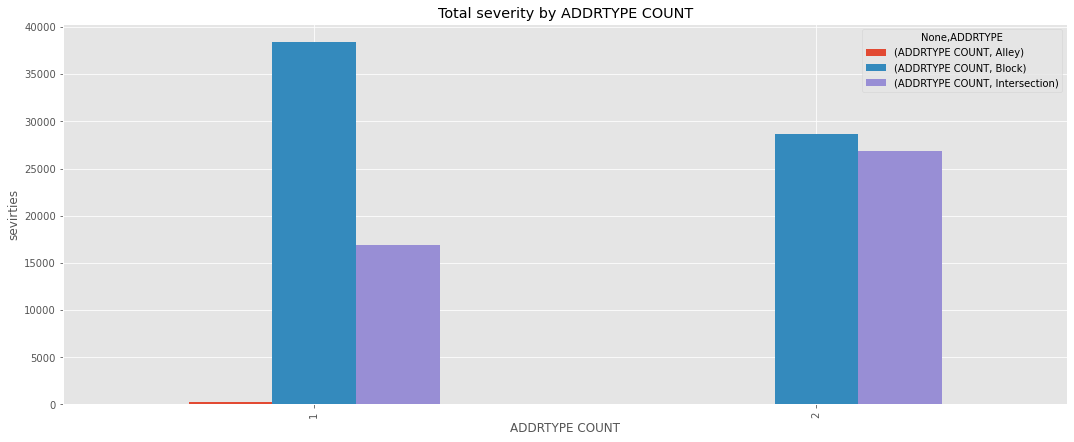

In [132]:
df2['ADDRTYPE COUNT'] = df.count(axis=1)
df_SC50 =df2.groupby('ADDRTYPE').count()
df_SC50
df80=df2[['SEVERITYCODE','ADDRTYPE','ADDRTYPE COUNT']]
df90 = df80.groupby((['SEVERITYCODE','ADDRTYPE']), axis=0).count()
df90.unstack()
my_plot = df90.unstack().plot(kind='bar',title="Total severity by ADDRTYPE COUNT",figsize=(18,7))
my_plot.set_xlabel("ADDRTYPE COUNT")
my_plot.set_ylabel("sevirties")

Text(0, 0.5, 'sevirties')

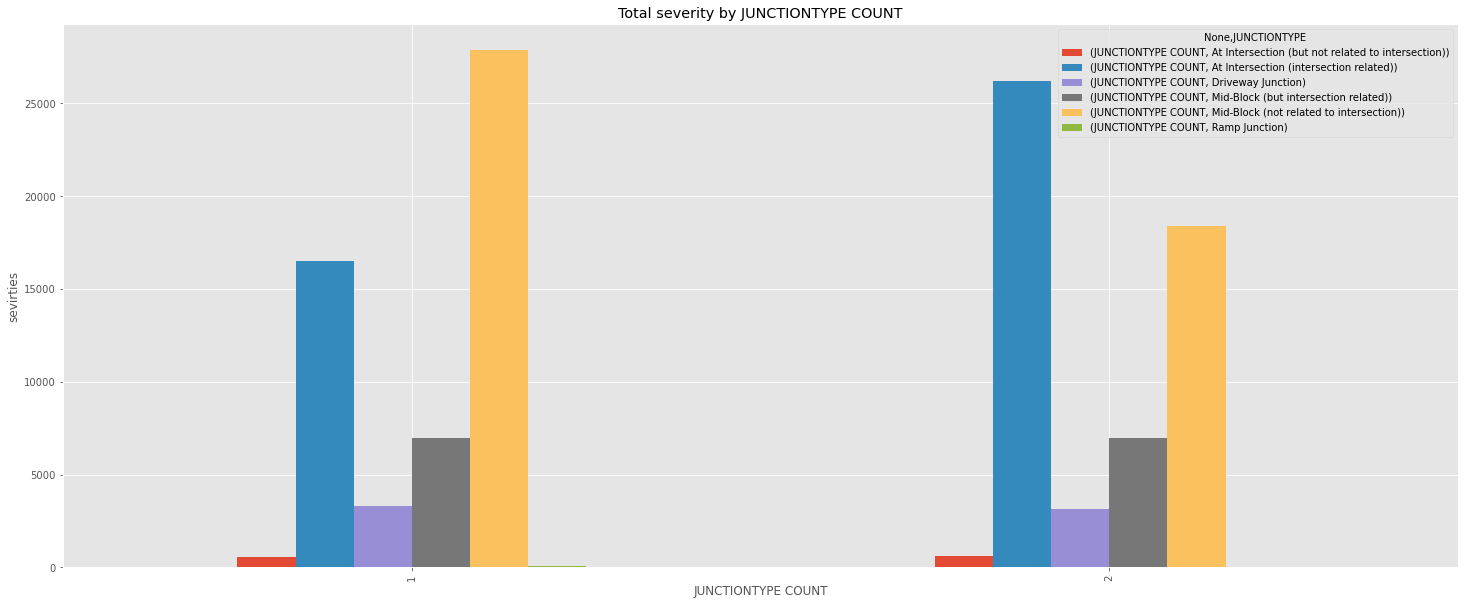

In [173]:
df2['JUNCTIONTYPE COUNT'] = df.count(axis=1)
df_SC51 =df2.groupby('JUNCTIONTYPE').count()
df_SC51
df81=df2[['SEVERITYCODE','JUNCTIONTYPE','JUNCTIONTYPE COUNT']]
df91 = df81.groupby((['SEVERITYCODE','JUNCTIONTYPE']), axis=0).count()
df91.unstack()
my_plot = df91.unstack().plot(kind='bar',title="Total severity by JUNCTIONTYPE COUNT",figsize=(25,10))
my_plot.set_xlabel("JUNCTIONTYPE COUNT")
my_plot.set_ylabel("sevirties")

Text(0, 0.5, 'sevirties')

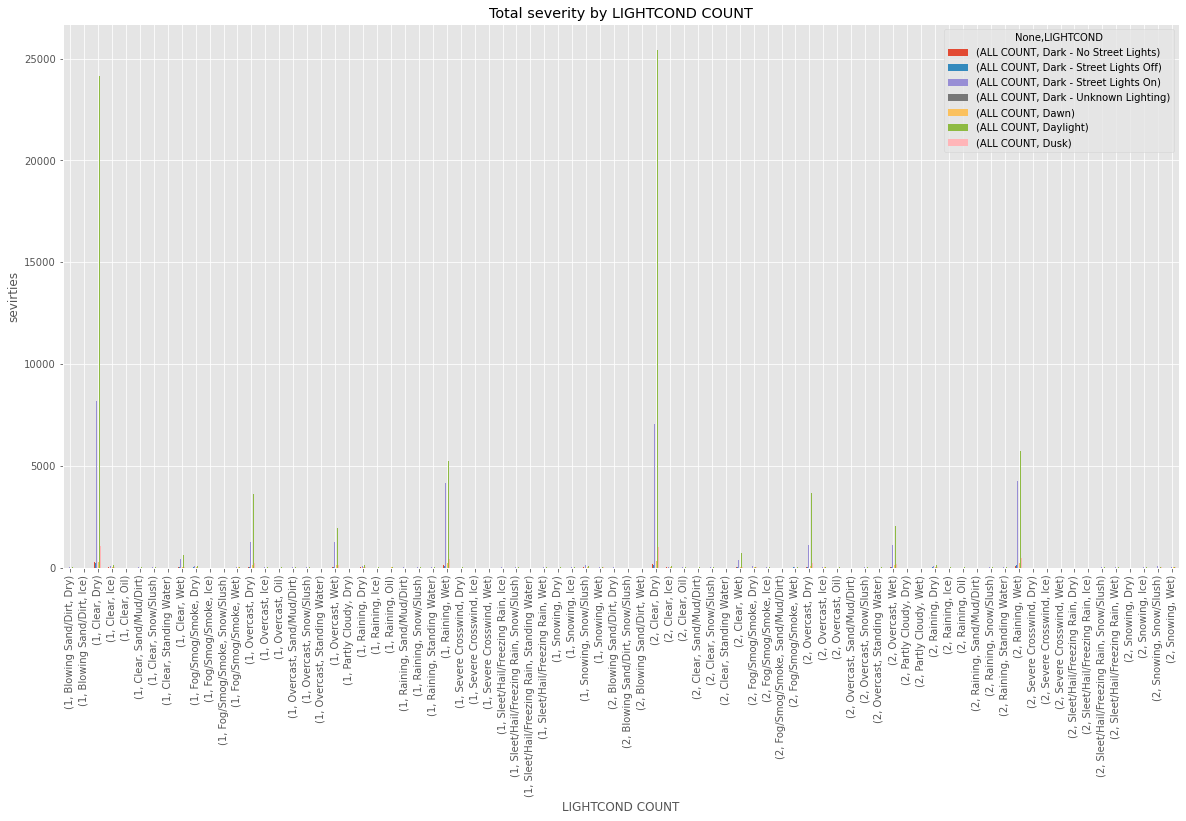

In [134]:
df2['ALL COUNT'] = df.count(axis=1)
df_SC5 =df2.groupby(['WEATHER','ROADCOND','LIGHTCOND']).count()
df_SC5
df10=df2[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND','ALL COUNT']]
df10
df11 = df10.groupby((['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']), axis=0).count()
df11.unstack()
my_plot = df11.unstack().plot(kind='bar',title="Total severity by LIGHTCOND COUNT",figsize=(20,10))
my_plot.set_xlabel("LIGHTCOND COUNT")
my_plot.set_ylabel("sevirties")

Text(0, 0.5, 'sevirties')

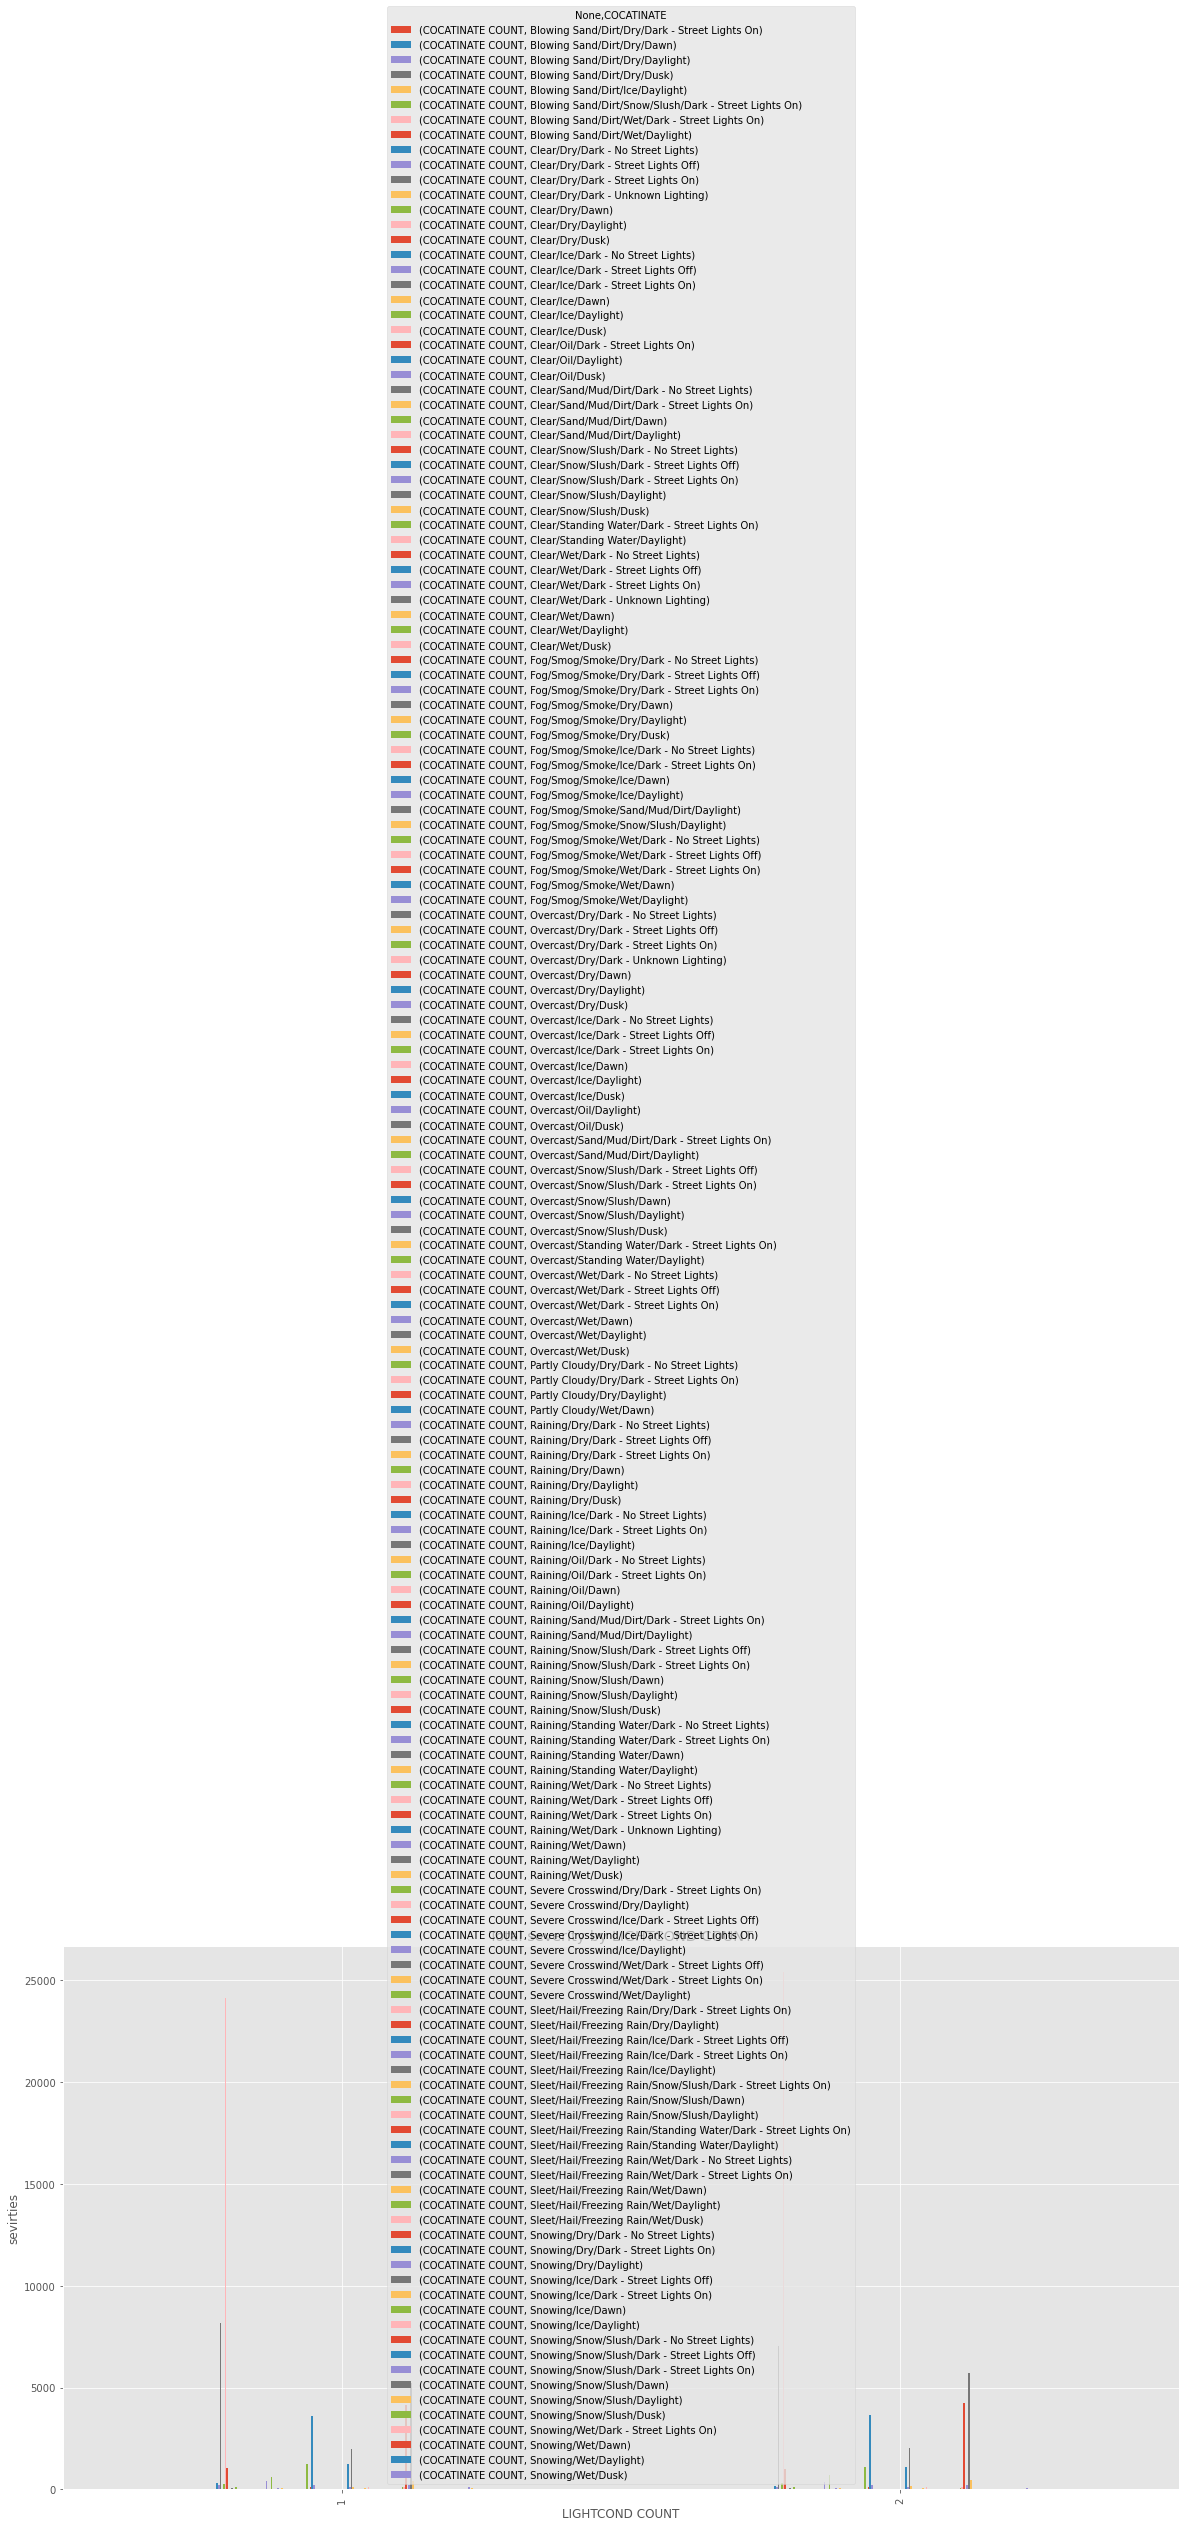

In [135]:
df2['COCATINATE'] =  df2["WEATHER"] +'/'+ df2['ROADCOND']+ '/'+df2['LIGHTCOND']
df2['COCATINATE COUNT'] = df.count(axis=1)
df_SC6 =df2.groupby(['SEVERITYCODE','COCATINATE']).count()
df12=df2[['SEVERITYCODE','COCATINATE','COCATINATE COUNT']]
df12
df13 = df12.groupby((['SEVERITYCODE','COCATINATE']), axis=0).count()

df13.unstack()
my_plot = df13.unstack().plot(kind='bar',title="Total severity by LIGHTCOND COUNT",figsize=(20,10))
my_plot.set_xlabel("LIGHTCOND COUNT")
my_plot.set_ylabel("sevirties")

In [177]:
df2['WEATHER']=df2['WEATHER'].replace(['Clear','Blowing Sand/Dirt','Fog/Smog/Smoke', 'Overcast','Partly Cloudy'\
                                      ,'Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing'], \
                                      ['0','1','2','3','4','5','6','7','8'])
                                     
df2['ROADCOND']=df2['ROADCOND'].replace(['Wet','Dry','Snow/Slush','Ice','Sand/Mud/Dirt','Standing Water','Oil'],\
                                        ['0','1','2','3','4','5','6'])

df2['LIGHTCOND']=df2['LIGHTCOND'].replace(['Daylight','Dark - Street Lights On','Dark - No Street Lights','Dusk',\
                                         'Dawn','Dark - Street Lights Off','Dark - Unknown Lighting'],\
                                        ['0','1','2','3','4','5','6'])
df2['ADDRTYPE']=df2['ADDRTYPE'].replace(['Intersection','Block','Alley'], ['0','1','2'])


df2['JUNCTIONTYPE']=df2['JUNCTIONTYPE'].replace(['At Intersection (intersection related)','Mid-Block (not related to intersection)','Driveway Junction','Mid-Block (but intersection related)','At Intersection (but not related to intersection)','Ramp Junction'], ['0','1','2','3','4','5'])

In [178]:
Feature = df2[['WEATHER','ROADCOND','LIGHTCOND','ADDRTYPE','JUNCTIONTYPE']]
Feature.reset_index()
Feature.head(300)



,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,JUNCTIONTYPE
137899,5,0,1,0,0
25062,0,1,1,0,0
115285,5,0,1,0,0
100430,5,0,0,1,1
76265,0,1,1,1,1
...,...,...,...,...,...
168928,5,0,0,1,1
103610,5,0,0,1,3
26198,0,1,0,0,0
14871,3,1,1,1,3


In [149]:
Feature.corr()

""


In [179]:
X=Feature
y = df2['SEVERITYCODE'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [180]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.67673671, -1.46435984,  0.60226867, -1.2312635 , -0.93403115],
       [-0.71309651,  0.49898007,  0.60226867, -1.2312635 , -0.93403115],
       [ 1.67673671, -1.46435984,  0.60226867, -1.2312635 , -0.93403115],
       [ 1.67673671, -1.46435984, -0.54177812,  0.80601937,  0.03831742],
       [-0.71309651,  0.49898007,  0.60226867,  0.80601937,  0.03831742]])

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)


(88512, 5)
(22128, 5)


In [190]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc





array([0.55319053, 0.51197578, 0.56557303, 0.5479483 , 0.5657086 ,
       0.55459147, 0.56227404, 0.56313268, 0.57429501, 0.55974331,
       0.53927151, 0.53683116, 0.53963304, 0.53705712, 0.54098879,
       0.54573391, 0.55770969, 0.5716739 , 0.56873644])

In [194]:


k=9
KNN= KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
KNN
yhat2=KNN.predict(X_test)
yhat2
print("train set acuurancy :", metrics.accuracy_score(y_train,KNN.predict(X_train)))
print("test set acuurancy :", metrics.accuracy_score(y_test,yhat2))
knn_yhat = KNN.predict(X_test)
knn_yhat
KNN_JAC=jaccard_score(y_test, knn_yhat)
KNN_F1=f1_score(y_test, knn_yhat, average='weighted')
print(KNN_JAC)
print(KNN_F1)


train set acuurancy : 0.5730409436008677
test set acuurancy : 0.574295010845987
0.3422247049787026
0.566901266823067


In [234]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, yhat2))
print(classification_report(y_test, yhat2))

[[4076 6943]
 [4097 7012]]
              precision    recall  f1-score   support

           1       0.50      0.37      0.42     11019
           2       0.50      0.63      0.56     11109

    accuracy                           0.50     22128
   macro avg       0.50      0.50      0.49     22128
weighted avg       0.50      0.50      0.49     22128



In [225]:
from sklearn import svm
SVM = svm.SVC(kernel='rbf',gamma='auto')
SVM.fit(X_train, y_train) 

SVC(gamma='auto')

In [226]:
svm_yhat = SVM.predict(X_test)
svm_yhat [0:20]

array([1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1],
      dtype=int64)

In [227]:
print("train set acuurancy :", metrics.accuracy_score(y_train,SVM.predict(X_train)))
print("test set acuurancy :", metrics.accuracy_score(y_test,svm_yhat))
SVM_yhat = SVM.predict(X_test)
SVM_yhat
SVM_JAC=jaccard_score(y_test, SVM_yhat)
SVM_F1=f1_score(y_test, SVM_yhat, average='weighted')
print(SVM_JAC)
print(SVM_F1)

train set acuurancy : 0.5911175885755604
test set acuurancy : 0.5876265365148229
0.42476202483767256
0.5874021615475408


In [221]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, SVM_yhat))
print(classification_report(y_test, SVM_yhat))

[[5733 5286]
 [5776 5333]]
              precision    recall  f1-score   support

           1       0.50      0.52      0.51     11019
           2       0.50      0.48      0.49     11109

    accuracy                           0.50     22128
   macro avg       0.50      0.50      0.50     22128
weighted avg       0.50      0.50      0.50     22128



In [208]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.2, solver='liblinear').fit(X_train,y_train)
LR
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.58411746, 0.41588254],
       [0.58411746, 0.41588254],
       [0.58411746, 0.41588254],
       ...,
       [0.38752174, 0.61247826],
       [0.38296417, 0.61703583],
       [0.39726117, 0.60273883]])

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=6, solver='liblinear').fit(X_train,y_train)
LR_yhat = LR.predict(X_test)

LR_JAC=jaccard_score(y_test, LR_yhat)
LR_F1=f1_score(y_test, LR_yhat, average='weighted')
LR2 = LogisticRegression(C=6, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
LR_PROP=log_loss(y_test, yhat_prob2)
print(LR_JAC)
print(LR_F1)
print("train set acuurancy :", metrics.accuracy_score(y_train,LR.predict(X_train)))
print("test set acuurancy :", metrics.accuracy_score(y_test,LR_yhat ))



0.45167441306161366
0.5796920224106341
train set acuurancy : 0.5886546456977585
test set acuurancy : 0.5841467823571945


In [236]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, LR_yhat))
print(classification_report(y_test, LR_yhat))

[[7580 3439]
 [5763 5346]]
              precision    recall  f1-score   support

           1       0.57      0.69      0.62     11019
           2       0.61      0.48      0.54     11109

    accuracy                           0.58     22128
   macro avg       0.59      0.58      0.58     22128
weighted avg       0.59      0.58      0.58     22128



In [273]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)
Decision_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Decision_Tree.fit(X_train,y_train)
Decision_Tree = Decision_Tree.predict(X_test)

Decision_Tree_JAC=jaccard_score(y_test,Decision_Tree)
Decision_Tree_F1=f1_score(y_test, Decision_Tree, average='weighted',labels=np.unique(Decision_Tree))
print("train set acuurancy :", metrics.accuracy_score(y_train,Decision_Tree))
print("test set acuurancy :", metrics.accuracy_score(y_test,Decision_Tree ))

print(Decision_Tree_JAC)
print(Decision_Tree_F1)

train set acuurancy : 0.5014280549530007
test set acuurancy : 0.5871475054229935
0.4130149836798684
0.5871336580322637


In [271]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, Decision_Tree))
print(classification_report(y_test, Decision_Tree))

[[16069 11571]
 [11269 16411]]
              precision    recall  f1-score   support

           1       0.59      0.58      0.58     27640
           2       0.59      0.59      0.59     27680

    accuracy                           0.59     55320
   macro avg       0.59      0.59      0.59     55320
weighted avg       0.59      0.59      0.59     55320



In [274]:
jaccard=[KNN_JAC,Decision_Tree_JAC,SVM_JAC,LR_JAC]
F1score=[KNN_F1,Decision_Tree_F1,SVM_F1,LR_F1]


In [275]:
df_report={'Algorithm':['KNN','Decision Tree','SVM','LogisticRegression'],'Jaccard':jaccard ,'F1-score':F1score }

report=pd.DataFrame(data=df_report,index=None,columns=['Algorithm','Jaccard','F1-score'])
report.reset_index(drop=True, inplace=True) 
report.rename_axis(None, inplace=True)
report

,Algorithm,Jaccard,F1-score
0,KNN,0.342225,0.566901
1,Decision Tree,0.413015,0.587134
2,SVM,0.424762,0.587402
3,LogisticRegression,0.451674,0.579692
